# Business Case : Our aim is to predict the price of an automobile based on 25 different features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("auto_imports_with_columns .csv")

In [3]:
pd.set_option('display.max_rows',None)

In [4]:
pd.set_option('display.max_columns', None)

# Basic Checks

In [5]:
data

,symbol,loses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine_loc,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.80,101,5800,23,29,16430


In [6]:
data.describe()

,symbol,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             201 non-null    int64  
 1   loses              201 non-null    object 
 2   brand              201 non-null    object 
 3   fuel               201 non-null    object 
 4   aspiration         201 non-null    object 
 5   doors              201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_loc         201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  cylinders          201 non-null    object 
 16  engine_size        201 non

# Domain Analysis

# Exploratory Data Analysis ( EDA )

# (i) Univariate Analysis

In [8]:
data_cat = data[["brand","fuel","aspiration","doors","body_style","drive_wheels","engine_loc","engine_type","cylinders","fuel_system"]]

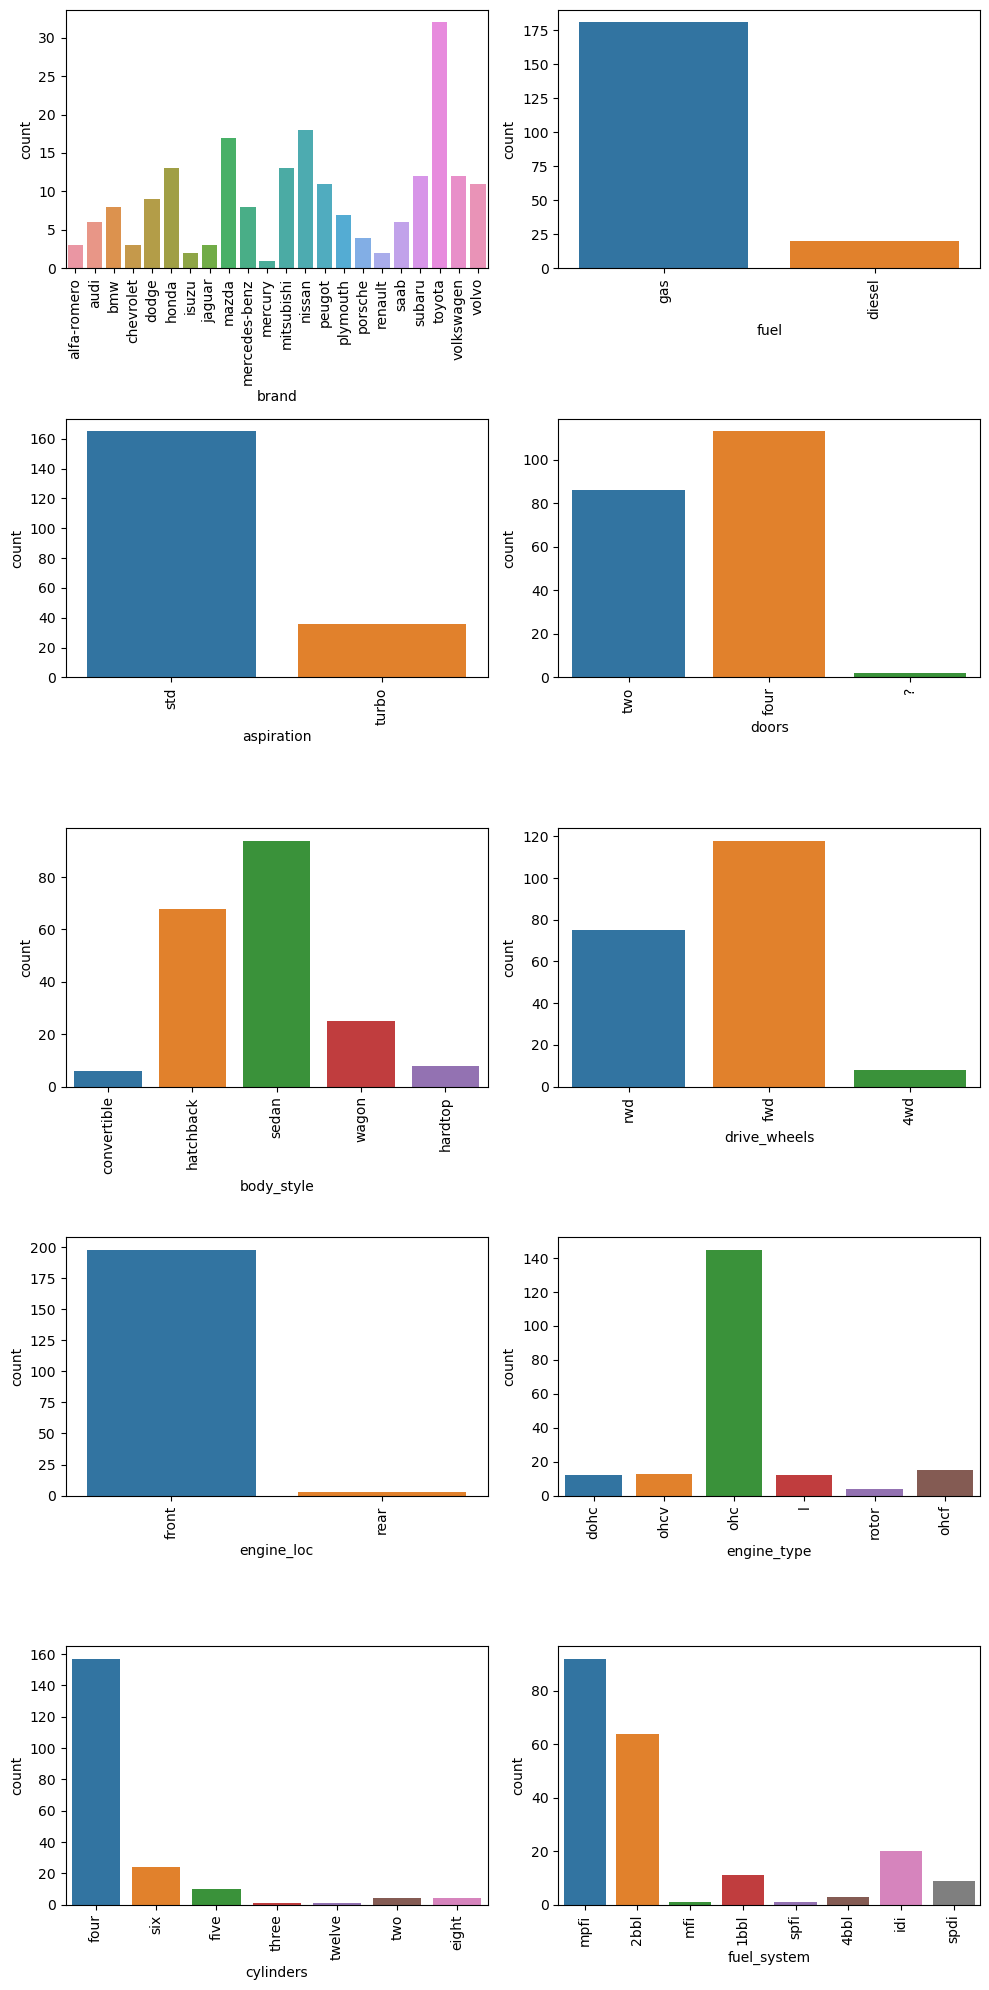

In [9]:
plt.figure(figsize=(10,20))  # for increasing the size of matrix
plotnumber = 1
for i in data_cat:
    plt.subplot(5,2,plotnumber)
    plt.xticks(rotation=90)
    sns.countplot(x=data_cat[i])
    plotnumber= plotnumber + 1
plt.tight_layout()

In [10]:
data_cont= data[["wheel_base","length","width","height","curb_weight","loses","engine_size","bore","stroke","compression_ratio","hp","peak_rpm","city_mpg","highway_mpg"]]

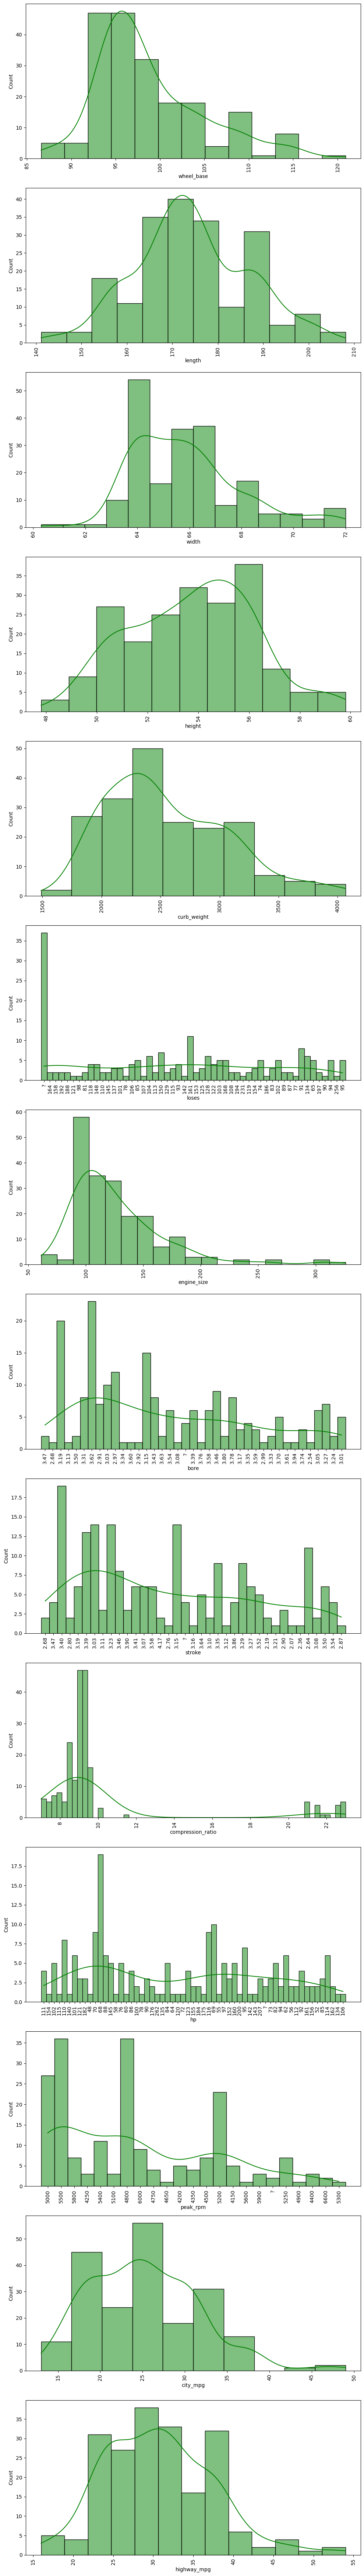

In [11]:
plt.figure(figsize=(10,70))  # for increasing the size of matrix
plotnumber = 1

for i in data_cont:
    plt.subplot(14,1,plotnumber)
    plt.xticks(rotation=90)
    sns.histplot(x=data_cont[i], kde=True , color='green')
    plotnumber= plotnumber + 1
plt.tight_layout()

## >>> Insights from Univariate Analysis

# (ii) Bivariate Analysis

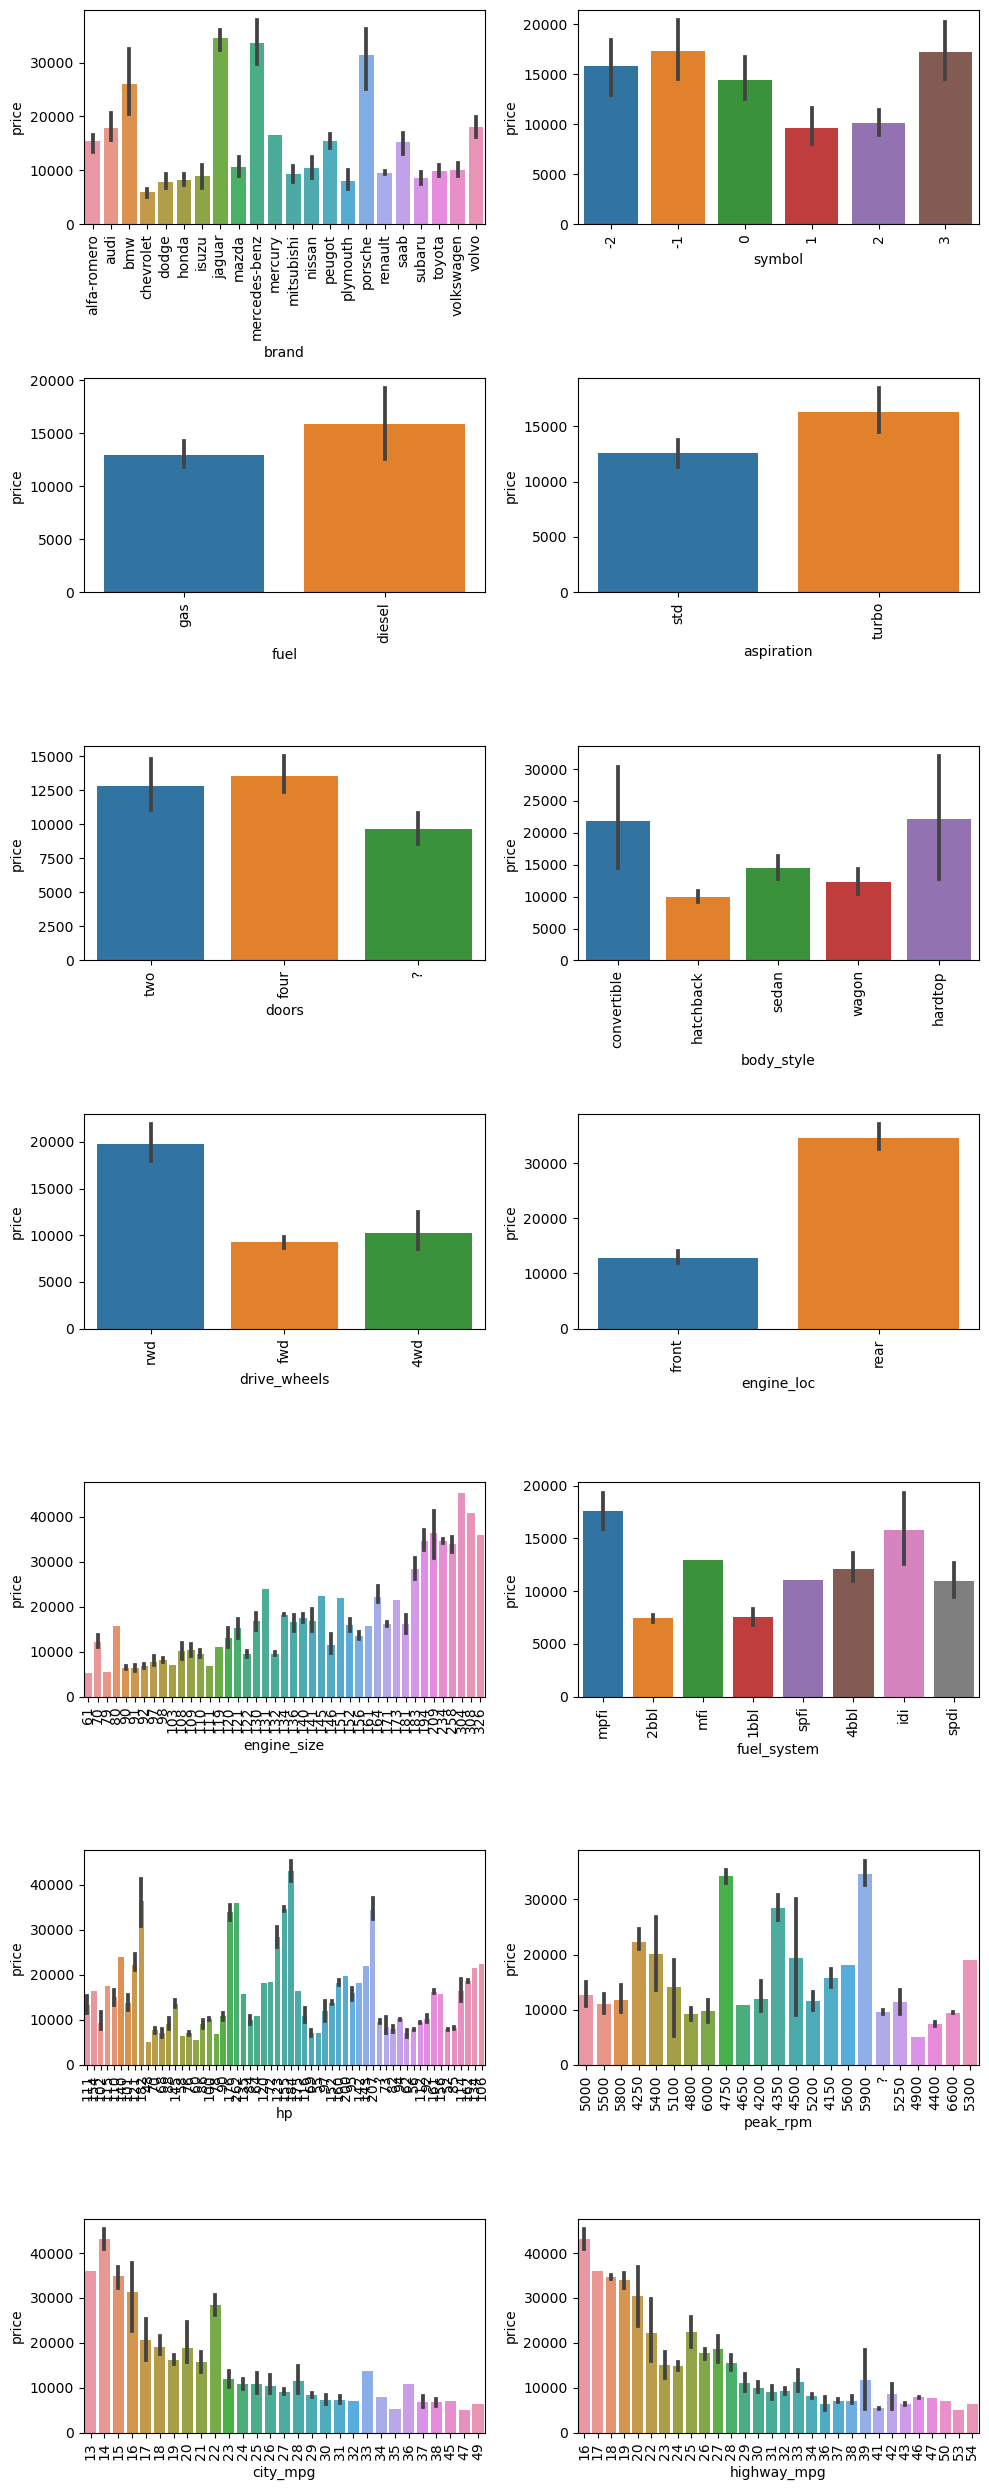

In [12]:
data_for_barplots=['brand','symbol','fuel','aspiration','doors','body_style','drive_wheels','engine_loc','engine_size','fuel_system','hp','peak_rpm','city_mpg','highway_mpg']
plt.figure(figsize=(10,25))  # for increasing the size of matrix
plotnumber = 1

for i in data_for_barplots:
    plt.subplot(7,2,plotnumber)
    plt.xticks(rotation=90)
    sns.barplot(x=i , y = 'price' ,data=data)
    plotnumber= plotnumber + 1
plt.tight_layout()

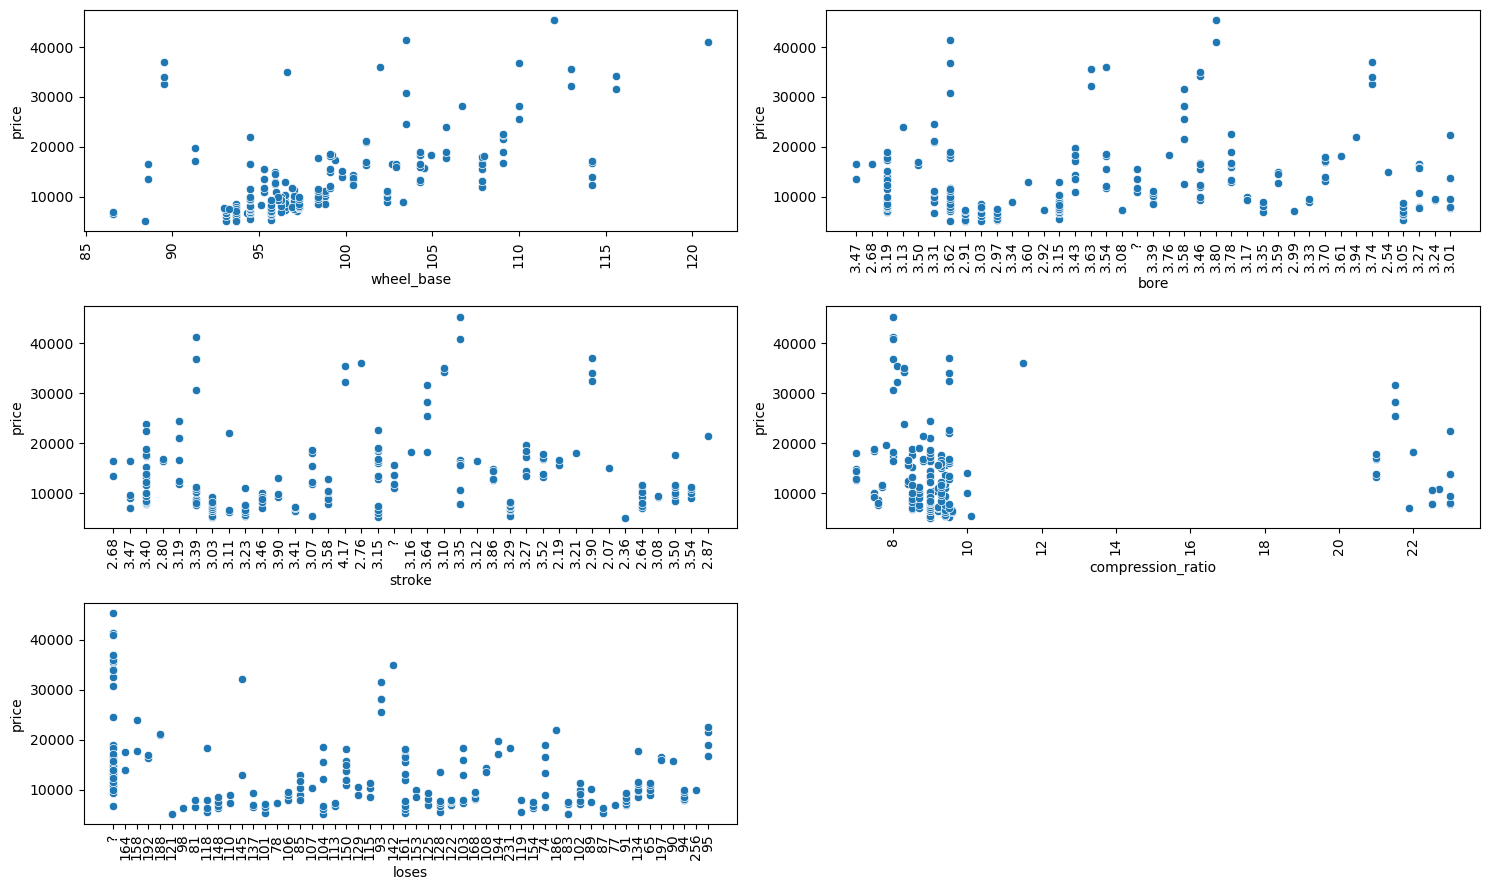

In [13]:
data_for_scatterplots=['wheel_base','bore','stroke','compression_ratio','loses']
plt.figure(figsize=(15,9))  # for increasing the size of matrix
plotnumber = 1

for i in data_for_scatterplots:
    plt.subplot(3,2,plotnumber)
    plt.xticks(rotation=90)
    sns.scatterplot(x=i , y = 'price' ,data=data)
    plotnumber= plotnumber + 1
plt.tight_layout()

## >>> Insights from Bivariate Analysis

# Data Pre-processing

# 1. Handling with Null Values

## a. Loses

In [14]:
data.loses

0        ?
1        ?
2        ?
3      164
4      164
5        ?
6      158
7        ?
8      158
9      192
10     192
11     188
12     188
13       ?
14       ?
15       ?
16       ?
17     121
18      98
19      81
20     118
21     118
22     118
23     148
24     148
25     148
26     148
27     110
28     145
29     137
30     137
31     101
32     101
33     101
34     110
35      78
36     106
37     106
38      85
39      85
40      85
41     107
42       ?
43       ?
44     145
45       ?
46       ?
47     104
48     104
49     104
50     113
51     113
52     150
53     150
54     150
55     150
56     129
57     115
58     129
59     115
60       ?
61     115
62     118
63       ?
64      93
65      93
66      93
67      93
68       ?
69     142
70       ?
71       ?
72       ?
73     161
74     161
75     161
76     161
77     153
78     153
79       ?
80       ?
81       ?
82     125
83     125
84     125
85     137
86     128
87     128
88     128
89     122
90     103

In [15]:
data2=data.loc[data['loses']!="?","loses"]

In [16]:
data2.to_frame()

,loses
3,164
4,164
6,158
8,158
9,192
10,192
11,188
12,188
17,121
18,98


In [17]:
data2=data2.astype({'loses':'int'})

In [18]:
np.mean(data2)

122.0

In [19]:
np.median(data2)

115.0

In [20]:
data.loc[data.loses=='?','loses']='122'

In [21]:
data=data.astype({'loses':'int'})

## b. Doors

In [22]:
data.loc[data.doors=='?','doors']='four'

In [23]:
import statistics 

In [24]:
statistics.mode(data.doors)

'four'

## c. Bore

In [25]:
new=data.loc[data.bore!='?','bore']

In [26]:
new.to_frame()

,bore
0,3.47
1,3.47
2,2.68
3,3.19
4,3.19
5,3.19
6,3.19
7,3.19
8,3.13
9,3.50


In [27]:
new=new.astype({'bore':'float'})

In [28]:
np.median(new)

3.31

In [29]:
data.loc[data.bore=='?','bore']='3.31'

In [30]:
data=data.astype({'bore':'float'})

## d. Stroke

In [31]:
new1=data.loc[data.stroke!='?','stroke']

In [32]:
new1.to_frame()

,stroke
0,2.68
1,2.68
2,3.47
3,3.40
4,3.40
5,3.40
6,3.40
7,3.40
8,3.40
9,2.80


In [33]:
new1=new1.astype({'stroke':'float'})

In [34]:
np.median(new1)

3.29

In [35]:
data.loc[data.stroke=='?','stroke']='3.29'

In [36]:
data=data.astype({'stroke':'float'})

## e.  Hp

In [37]:
new2=data.loc[data.hp!='?','hp']

In [38]:
new2.to_frame()

,hp
0,111
1,111
2,154
3,102
4,115
5,110
6,110
7,110
8,140
9,101


In [39]:
new2=new2.astype({'hp':'int'})

In [40]:
np.median(new2)

95.0

In [41]:
data.loc[data.hp=='?','hp']='95'

In [42]:
data=data.astype({'hp':'int'})

## f. Peak rpm

In [43]:
new3=data.loc[data.peak_rpm!='?','peak_rpm']

In [44]:
new3.to_frame()

,peak_rpm
0,5000
1,5000
2,5000
3,5500
4,5500
5,5500
6,5500
7,5500
8,5500
9,5800


In [45]:
new3=new3.astype({'peak_rpm':'int'})

In [46]:
np.median(new3)

5200.0

In [47]:
data.loc[data.peak_rpm=='?','peak_rpm']='5200'

In [48]:
data=data.astype({'peak_rpm':'int'})

# 2 . Outliers

In [49]:
data.describe().columns

Index(['symbol', 'loses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'hp', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

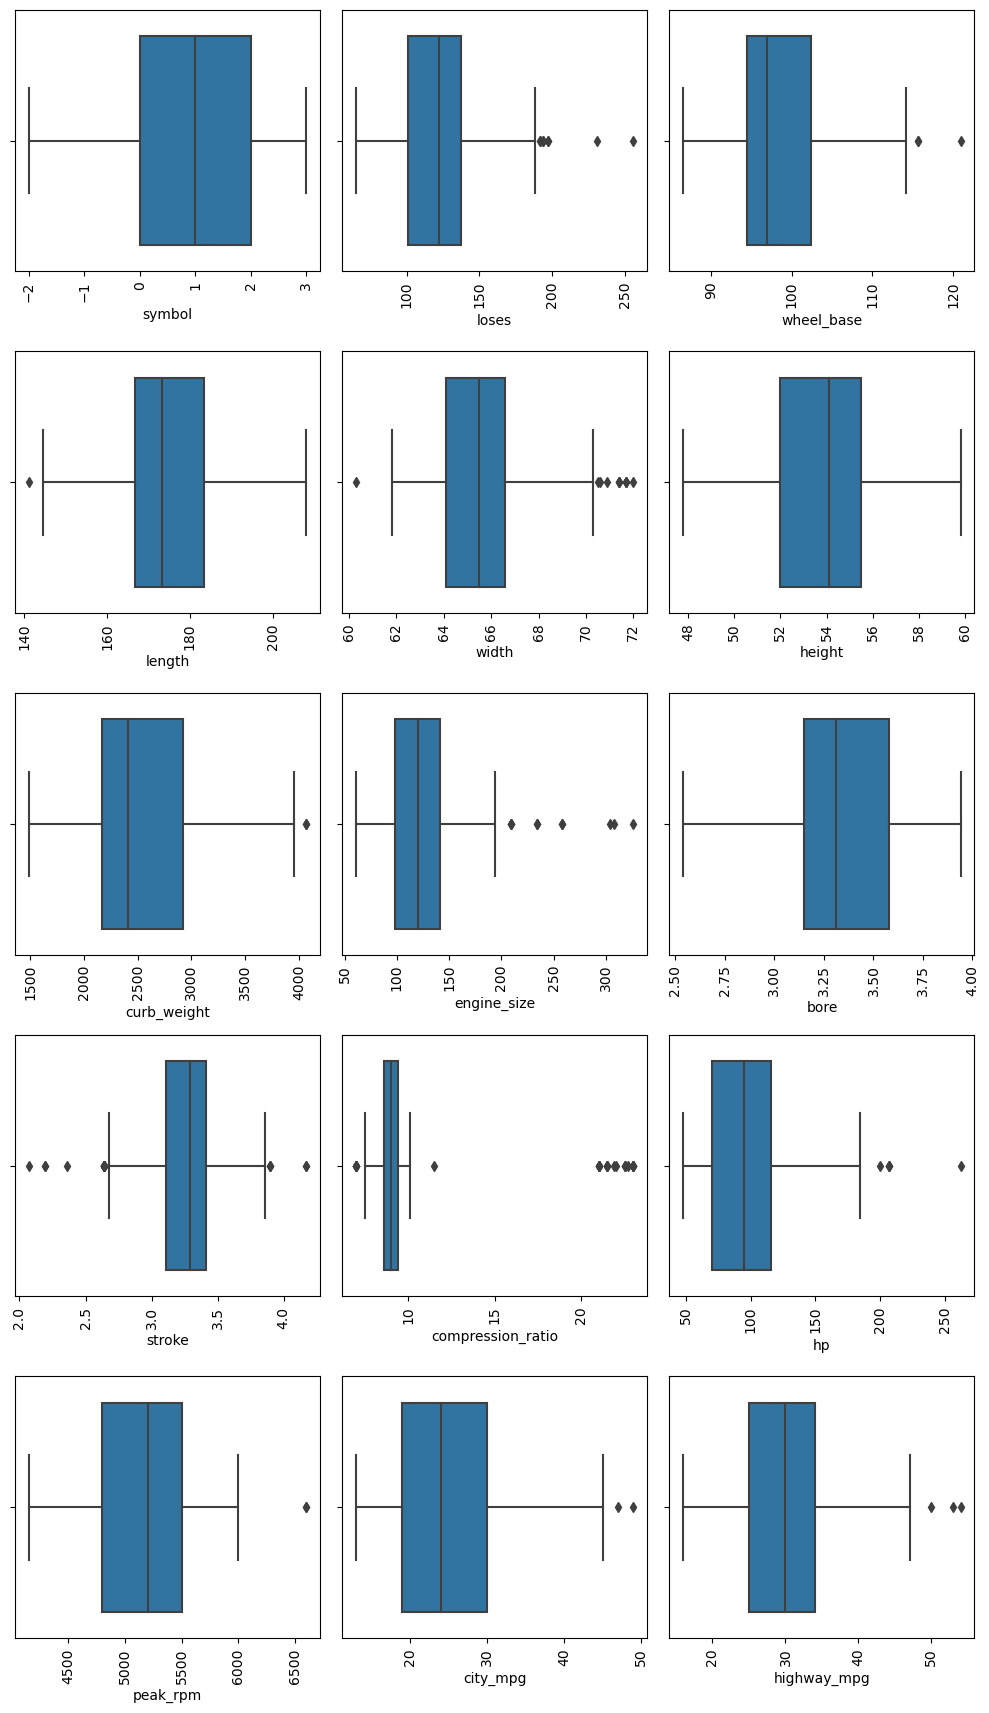

In [50]:
outliers_columns=['symbol', 'loses', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio',
       'hp', 'peak_rpm', 'city_mpg', 'highway_mpg']
plt.figure(figsize=(10,20))  # for increasing the size of matrix
plotnumber = 1

for i in outliers_columns:
    plt.subplot(6,3,plotnumber)
    plt.xticks(rotation=90)
    sns.boxplot(x=data[i])
    plotnumber= plotnumber + 1
plt.tight_layout()

In [51]:
data.loc[data.compression_ratio>20,'compression_ratio'] = np.median(data.compression_ratio)

## 3.  Conversion of Categorical data to Numerical data

In [52]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [53]:
list1=['brand', 'fuel', 'aspiration', 'doors', 'body_style',
       'drive_wheels', 'engine_loc','engine_type', 'cylinders','fuel_system']

for i in list1:
    data[i]=lc.fit_transform(data[i])

## 4.  Scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [55]:
data[['loses','wheel_base', 'length', 'width', 'height',
       'curb_weight','engine_size','compression_ratio','hp', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']]=scale.fit_transform(data[['loses','wheel_base', 'length', 'width', 'height',
       'curb_weight','engine_size','compression_ratio','hp', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price']])

In [56]:
data.head()

,symbol,loses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine_loc,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,peak_rpm,city_mpg,highway_mpg,price
0,3,0.298429,0,1,0,1,0,2,0,0.058309,0.413433,0.324786,0.083333,0.411171,0,2,0.260377,5,3.47,2.68,0.444444,0.294393,0.346939,0.222222,0.289474,0.207959
1,3,0.298429,0,1,0,1,0,2,0,0.058309,0.413433,0.324786,0.083333,0.411171,0,2,0.260377,5,3.47,2.68,0.444444,0.294393,0.346939,0.222222,0.289474,0.282558
2,1,0.298429,0,1,0,1,2,2,0,0.230321,0.449254,0.444444,0.383333,0.517843,4,3,0.343396,5,2.68,3.47,0.444444,0.495327,0.346939,0.166667,0.263158,0.282558
3,2,0.518325,1,1,0,0,3,1,0,0.384840,0.529851,0.504274,0.541667,0.329325,2,2,0.181132,5,3.19,3.40,0.666667,0.252336,0.551020,0.305556,0.368421,0.219254
4,2,0.518325,1,1,0,0,3,0,0,0.373178,0.529851,0.521368,0.541667,0.518231,2,1,0.283019,5,3.19,3.40,0.222222,0.313084,0.551020,0.138889,0.157895,0.306142


# Feature selection

<AxesSubplot:>

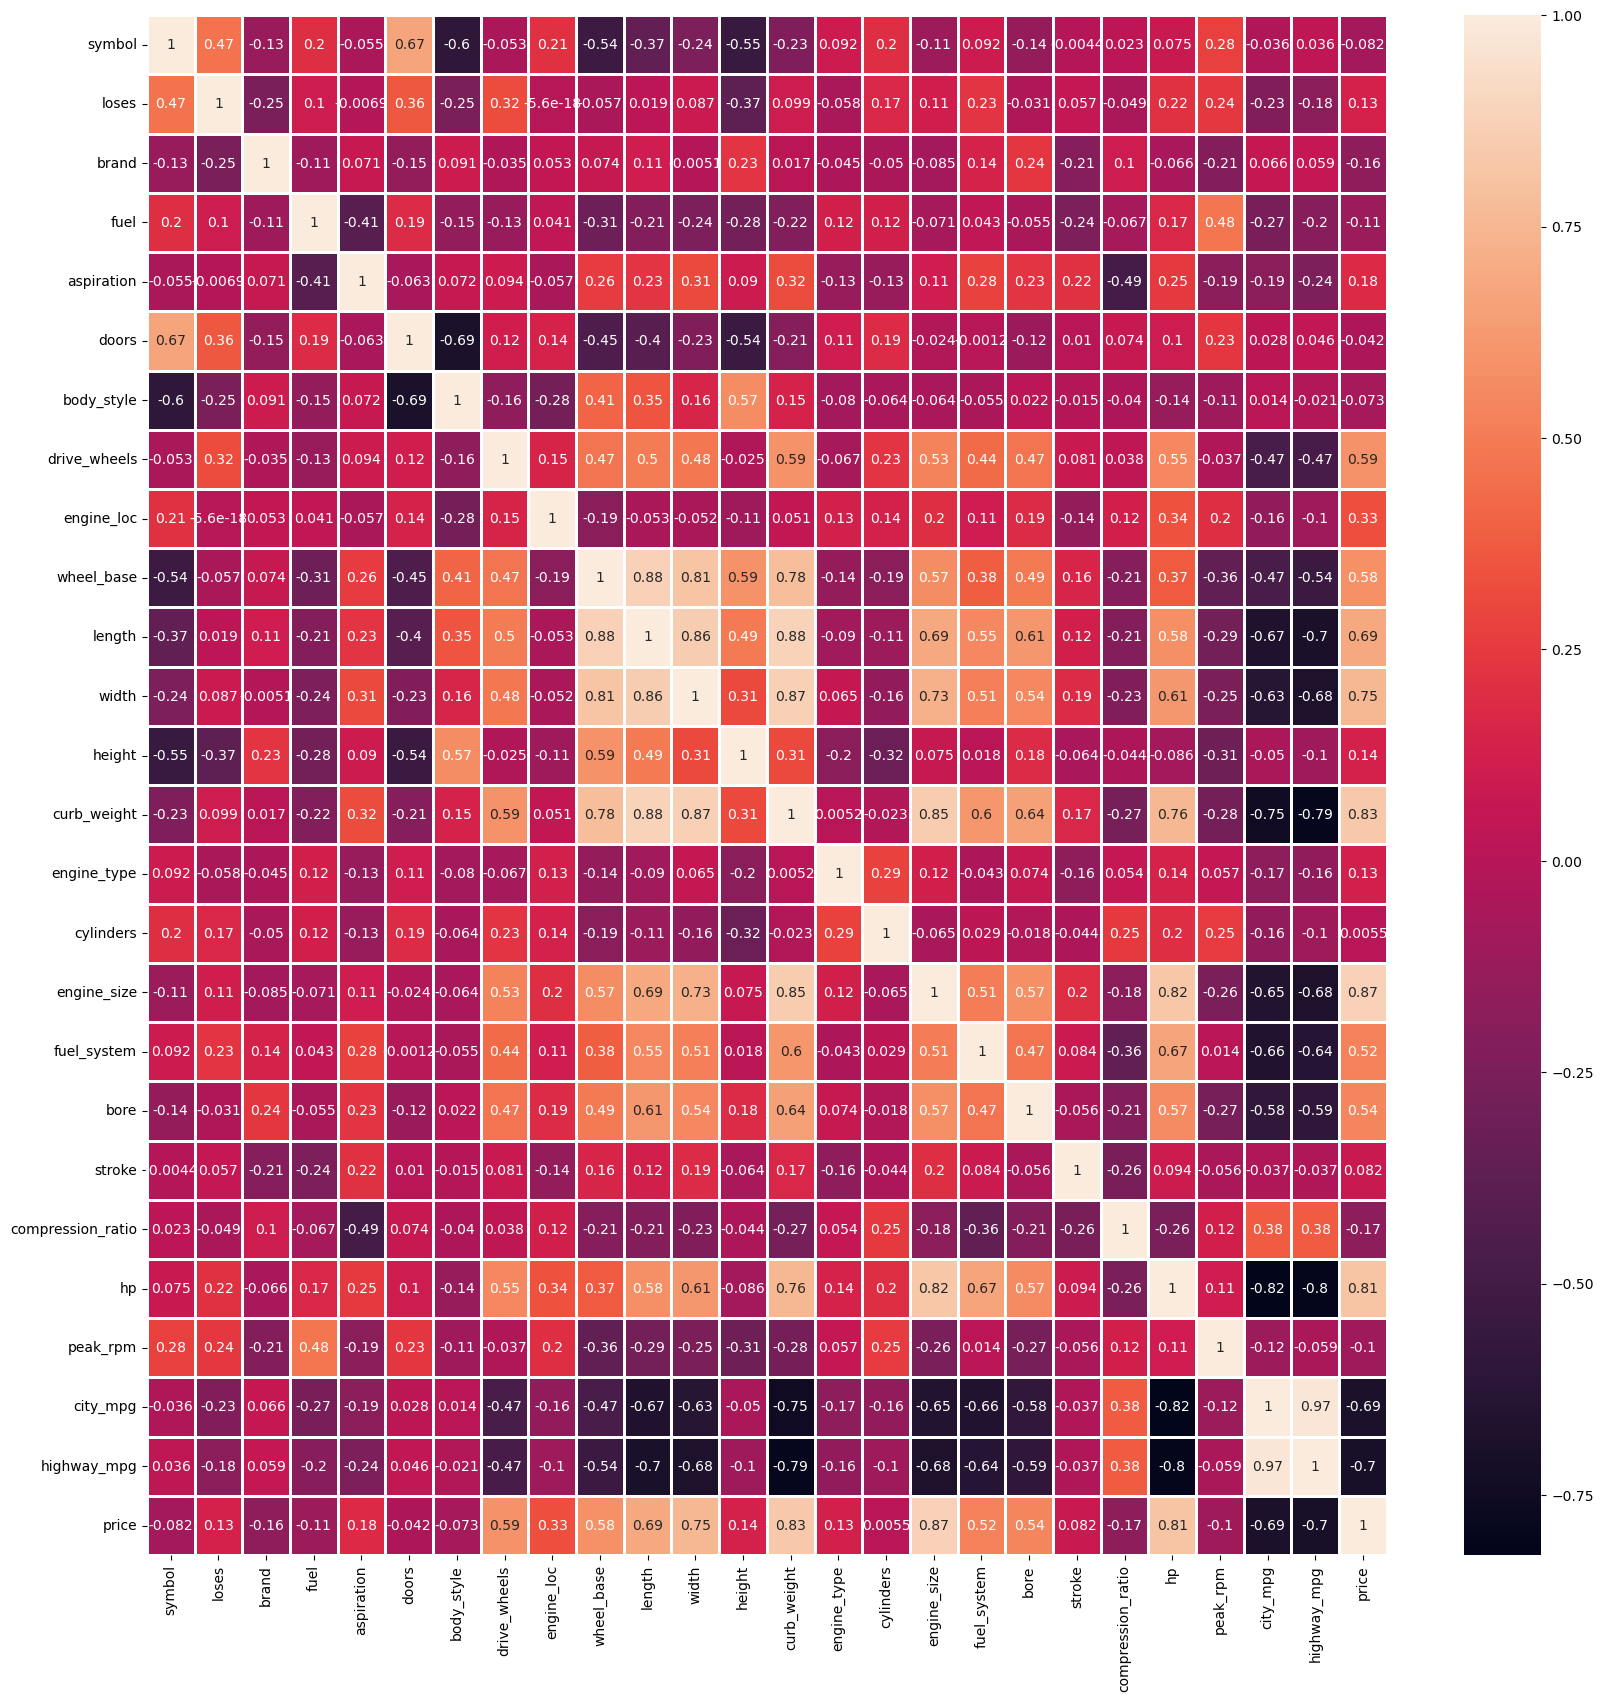

In [57]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True , linewidth=1)

In [58]:
x=data.drop('price',axis=1)
x

,symbol,loses,brand,fuel,aspiration,doors,body_style,drive_wheels,engine_loc,wheel_base,length,width,height,curb_weight,engine_type,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,hp,peak_rpm,city_mpg,highway_mpg
0,3,0.298429,0,1,0,1,0,2,0,0.058309,0.413433,0.324786,0.083333,0.411171,0,2,0.260377,5,3.47,2.68,0.444444,0.294393,0.346939,0.222222,0.289474
1,3,0.298429,0,1,0,1,0,2,0,0.058309,0.413433,0.324786,0.083333,0.411171,0,2,0.260377,5,3.47,2.68,0.444444,0.294393,0.346939,0.222222,0.289474
2,1,0.298429,0,1,0,1,2,2,0,0.230321,0.449254,0.444444,0.383333,0.517843,4,3,0.343396,5,2.68,3.47,0.444444,0.495327,0.346939,0.166667,0.263158
3,2,0.518325,1,1,0,0,3,1,0,0.384840,0.529851,0.504274,0.541667,0.329325,2,2,0.181132,5,3.19,3.40,0.666667,0.252336,0.551020,0.305556,0.368421
4,2,0.518325,1,1,0,0,3,0,0,0.373178,0.529851,0.521368,0.541667,0.518231,2,1,0.283019,5,3.19,3.40,0.222222,0.313084,0.551020,0.138889,0.157895
5,2,0.298429,1,1,0,1,3,1,0,0.384840,0.540299,0.512821,0.441667,0.395268,2,1,0.283019,5,3.19,3.40,0.333333,0.289720,0.551020,0.166667,0.236842
6,1,0.486911,1,1,0,0,3,1,0,0.559767,0.770149,0.948718,0.658333,0.525989,2,1,0.283019,5,3.19,3.40,0.333333,0.289720,0.551020,0.166667,0.236842
7,1,0.298429,1,1,0,0,4,1,0,0.559767,0.770149,0.948718,0.658333,0.568658,2,1,0.283019,5,3.19,3.40,0.333333,0.289720,0.551020,0.166667,0.236842
8,1,0.486911,1,1,1,0,3,1,0,0.559767,0.770149,0.948718,0.675000,0.619860,2,1,0.264151,5,3.13,3.40,0.288889,0.429907,0.551020,0.111111,0.105263
9,2,0.664921,2,1,0,1,3,2,0,0.425656,0.532836,0.384615,0.541667,0.351823,2,2,0.177358,5,3.50,2.80,0.400000,0.247664,0.673469,0.277778,0.342105


In [59]:
y=data.price
y

0      0.207959
1      0.282558
2      0.282558
3      0.219254
4      0.306142
5      0.251527
6      0.312596
7      0.342634
8      0.465642
9      0.280820
10     0.293109
11     0.393526
12     0.396877
13     0.482771
14     0.636562
15     0.898590
16     0.788491
17     0.000819
18     0.029219
19     0.036170
20     0.011271
21     0.031255
22     0.070478
23     0.027581
24     0.039075
25     0.061839
26     0.085398
27     0.094409
28     0.194777
29     0.033787
30     0.043121
31     0.006976
32     0.035028
33     0.049923
34     0.054044
35     0.054044
36     0.068939
37     0.098729
38     0.092523
39     0.128519
40     0.194305
41     0.129760
42     0.041383
43     0.147212
44     0.673551
45     0.755474
46     0.766645
47     0.001912
48     0.024254
49     0.041631
50     0.039149
51     0.056526
52     0.144655
53     0.166998
54     0.211683
55     0.261333
56     0.092523
57     0.083834
58     0.135966
59     0.127278
60     0.140931
61     0.152103
62     0

In [60]:
from sklearn.model_selection import train_test_split

train_test_split(x,y,test_size=0.25)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=33)

In [61]:
x_train.values , x_train.shape

(array([[ 3.        ,  0.69109948, 19.        , ...,  0.42857143,
          0.16666667,  0.21052632],
        [-1.        ,  0.04712042, 21.        , ...,  0.51020408,
          0.30555556,  0.31578947],
        [ 2.        ,  0.29842932, 16.        , ...,  0.42857143,
          0.27777778,  0.39473684],
        ...,
        [ 0.        ,  0.14659686,  9.        , ...,  0.08163265,
          0.25      ,  0.23684211],
        [ 2.        ,  0.09424084, 18.        , ...,  0.10204082,
          0.36111111,  0.39473684],
        [ 1.        ,  0.27748691,  4.        , ...,  0.55102041,
          0.66666667,  0.65789474]]),
 (150, 25))

In [62]:
x_test.values , x_test.shape

(array([[ 0.        ,  0.29842932,  2.        , ...,  0.51020408,
          0.08333333,  0.15789474],
        [-1.        ,  0.        , 19.        , ...,  0.02040816,
          0.38888889,  0.42105263],
        [ 1.        ,  0.86910995, 12.        , ...,  0.42857143,
          0.16666667,  0.23684211],
        ...,
        [ 0.        ,  0.13612565, 19.        , ...,  0.26530612,
          0.69444444,  0.81578947],
        [ 0.        ,  0.5026178 , 13.        , ...,  0.34693878,
          0.16666667,  0.21052632],
        [ 1.        ,  0.28272251, 14.        , ...,  0.55102041,
          0.66666667,  0.65789474]]),
 (51, 25))

In [63]:
y_train.values , y_train.shape

(array([0.27009582, 0.28293034, 0.11858895, 0.15964947, 0.03907452,
        0.74321037, 0.12069907, 0.08043295, 0.07047813, 0.33518693,
        0.16324909, 0.05910829, 0.07772702, 0.72156298, 0.34573755,
        0.24631349, 0.28082022, 0.3125962 , 0.43076312, 0.04917829,
        0.20299389, 0.19418102, 0.1209225 , 0.25971898, 0.57420188,
        0.00672757, 0.02921901, 0.20597289, 0.39687702, 0.50727372,
        0.        , 0.17506579, 0.08269202, 0.12107145, 0.07186833,
        0.15096073, 0.10277543, 0.06169008, 0.29683233, 0.09085944,
        0.06901346, 0.21664763, 0.18646045, 0.28739884, 0.07298545,
        0.06595998, 0.28255797, 0.31157837, 0.88977707, 0.10865895,
        0.39352564, 0.26244973, 0.12851894, 0.09252271, 0.09440941,
        0.32833524, 0.03125465, 0.07152078, 0.043121  , 0.25152674,
        0.05538454, 0.21925426, 0.03401023, 0.16712179, 0.09872896,
        0.12976019, 0.11223375, 0.3061417 , 0.02658756, 0.05652649,
        0.04984857, 0.19477682, 0.02425401, 0.06

In [64]:
y_test.values  , y_test.shape

(array([8.98589941e-01, 1.20897671e-01, 3.29700611e-01, 6.18390348e-02,
        7.04781292e-02, 1.09726429e-01, 2.11682637e-01, 8.19224468e-04,
        2.75805571e-02, 2.08058190e-01, 2.92487960e-01, 4.65642222e-01,
        3.90745246e-02, 9.25227149e-02, 3.37868030e-02, 4.46849710e-02,
        2.32634924e-01, 1.03693958e-01, 1.78044784e-01, 1.03296758e-01,
        4.06310511e-01, 4.51814706e-02, 3.91489996e-02, 3.26746438e-01,
        6.65557817e-02, 5.40439899e-02, 5.16359664e-02, 6.36562236e-01,
        5.41432898e-02, 1.52177151e-01, 4.34610993e-01, 2.63939228e-01,
        1.52450226e-01, 7.92165235e-01, 4.29720471e-02, 3.85035500e-02,
        1.00000000e+00, 2.91122586e-01, 8.38339705e-02, 2.85785214e-01,
        4.64475448e-02, 2.99910630e-01, 1.91152376e-03, 9.44094136e-02,
        6.73551462e-01, 4.13832481e-02, 2.08058190e-01, 6.38250335e-02,
        6.50414577e-02, 1.68363041e-01, 1.12705427e-02]),
 (51,))

# Model creation

# 1 . Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [66]:
y_predict=LR.predict(x_test)
y_predict , y_predict.shape

(array([ 0.49993725,  0.11516867,  0.42331794,  0.04081954,  0.04857138,
         0.09941443,  0.13030879, -0.15936755,  0.0424463 ,  0.40193132,
         0.34569188,  0.41726748,  0.01189598,  0.13637119, -0.07185735,
         0.02310793,  0.22834437,  0.11735716,  0.10837145,  0.14796249,
         0.41983644,  0.01926374,  0.04389563,  0.29604492,  0.01454193,
         0.09496376,  0.04262899,  0.5369671 , -0.00613464,  0.11865091,
         0.28943233,  0.30354555,  0.11621511,  0.72494954,  0.0334083 ,
         0.03062802,  0.81053514,  0.28261714,  0.09275737,  0.28773019,
         0.12128405,  0.41151047,  0.03019159,  0.192229  ,  0.59705832,
         0.11996482,  0.41633835,  0.06376525, -0.00670756,  0.28337738,
        -0.02610437]),
 (51,))

# >  Model Evaluation

In [67]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
mse1=mean_squared_error(y_test,y_predict) 
mae1=mean_absolute_error(y_test,y_predict) 
import math
rmse1=math.sqrt(mse1)
print(mse1,',' ,mae1, ',' ,rmse1)

0.008913621717067902 , 0.06310766379028782 , 0.09441197867361907


In [68]:
r2_1=r2_score(y_test,y_predict)
r2_1

0.8337089918490546

In [69]:
adj_r2_1=1-((1-r2_1)*(51-1)/(51-25-1))   # 3 refers to TV , Radio , Newspaper      51 refers to no. of predicted values
adj_r2_1

0.6674179836981091

# 2 . Support Vector Machine ( SVM )

In [70]:
from sklearn.svm import SVR
svRegressor = SVR() 
svRegressor.fit(x_train,y_train)

SVR()

In [71]:
y_predict=svRegressor.predict(x_test)

# > Model Evaluation

In [72]:
mse2=mean_squared_error(y_test,y_predict) 
mae2=mean_absolute_error(y_test,y_predict) 
import math
rmse2=math.sqrt(mse2)
print(mse2,',' ,mae2, ',' ,rmse2)

0.021686531423344795 , 0.10862243653529471 , 0.14726347620284128


In [73]:
r2_2=r2_score(y_test,y_predict)
r2_2

0.5954197644735327

## 3 .  DECISION TREE 

In [74]:
from sklearn.tree import DecisionTreeRegressor   #importing decision tree from sklearn.tree
dt = DecisionTreeRegressor()                     #object creation for decision tree  
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [75]:
y_predict1=dt.predict(x_test)

In [76]:
y_test.values

array([8.98589941e-01, 1.20897671e-01, 3.29700611e-01, 6.18390348e-02,
       7.04781292e-02, 1.09726429e-01, 2.11682637e-01, 8.19224468e-04,
       2.75805571e-02, 2.08058190e-01, 2.92487960e-01, 4.65642222e-01,
       3.90745246e-02, 9.25227149e-02, 3.37868030e-02, 4.46849710e-02,
       2.32634924e-01, 1.03693958e-01, 1.78044784e-01, 1.03296758e-01,
       4.06310511e-01, 4.51814706e-02, 3.91489996e-02, 3.26746438e-01,
       6.65557817e-02, 5.40439899e-02, 5.16359664e-02, 6.36562236e-01,
       5.41432898e-02, 1.52177151e-01, 4.34610993e-01, 2.63939228e-01,
       1.52450226e-01, 7.92165235e-01, 4.29720471e-02, 3.85035500e-02,
       1.00000000e+00, 2.91122586e-01, 8.38339705e-02, 2.85785214e-01,
       4.64475448e-02, 2.99910630e-01, 1.91152376e-03, 9.44094136e-02,
       6.73551462e-01, 4.13832481e-02, 2.08058190e-01, 6.38250335e-02,
       6.50414577e-02, 1.68363041e-01, 1.12705427e-02])

In [77]:
y_predict1

array([0.78849114, 0.14348841, 0.36197309, 0.10277543, 0.07047813,
       0.15582642, 0.15582642, 0.01127054, 0.02658756, 0.26244973,
       0.31855419, 0.3061417 , 0.05045678, 0.12851894, 0.043121  ,
       0.06901346, 0.24206842, 0.20299389, 0.20299389, 0.10329676,
       0.48277146, 0.03617   , 0.05652649, 0.16324909, 0.04992304,
       0.05404399, 0.03028648, 0.78849114, 0.04992304, 0.14348841,
       0.19418102, 0.26244973, 0.09440941, 0.69907155, 0.03800705,
       0.02658756, 0.88977707, 0.19418102, 0.07638648, 0.25971898,
       0.07623753, 0.36197309, 0.02425401, 0.09440941, 0.75547391,
       0.07186833, 0.23040068, 0.07047813, 0.03617   , 0.25971898,
       0.00697582])

# > Model Evaluation

In [78]:
mse3=mean_squared_error(y_test,y_predict1) 
mae3=mean_absolute_error(y_test,y_predict1) 
import math
rmse3=math.sqrt(mse3)
print(mse3,',' ,mae3, ',' ,rmse3)

0.0045929584340969765 , 0.04458591440150859 , 0.06777136883741523


In [79]:
r2_3=r2_score(y_test,y_predict)
r2_3

0.5954197644735327

# Comparison of three models 

In [80]:
all={'MSE':[mse1,mse2,mse3],'MAE':[mae1,mae2,mae3],'RMSE':[rmse1,rmse2,rmse3],'R2 score':[r2_1,r2_2,r2_3]}

In [81]:
df=pd.DataFrame(all,index=["Linear_Regression","Support_vector_machine","Decision_Tree"])

In [82]:
df

,MSE,MAE,RMSE,R2 score
Linear_Regression,0.008914,0.063108,0.094412,0.833709
Support_vector_machine,0.021687,0.108622,0.147263,0.595420
Decision_Tree,0.004593,0.044586,0.067771,0.595420


# Conclusion :